# Study on HateXplain

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import os
from os import path

import sys
sys.path.append("./../src")

In [2]:
from modules.logger import init_logging
from modules.logger import log

init_logging(color=True)

In [3]:
cache_path = path.join(os.getcwd(), '..', '.cache')
dataset_path = path.join(cache_path, 'dataset')
tmp_path = path.join('.cache', '2022-07-27')
os.makedirs(tmp_path,exist_ok=True)

## Download dataset from scratch

In [3]:
from datasets import load_dataset
import shutil

dataset = load_dataset("hatexplain", cache_dir=path.join(cache_path, 'dataset'))

shutil.rmtree(path.join(dataset_path, 'downloads'), ignore_errors=True)
for fname in os.listdir(dataset_path):
    if fname.endswith('.lock'): os.remove(os.path.join( dataset_path, fname ))

Reusing dataset hatexplain (/Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/plain_text/1.0.0/df474d8d8667d89ef30649bf66e9c856ad8305bef4bc147e8e31cbdf1b8e0249)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
train_set = dataset['train']

In [5]:
from torchtext.vocab import build_vocab_from_iterator

vocab = build_vocab_from_iterator(iter(doc for doc in train_set['post_tokens']))
print('Taille de vocab:', len(vocab))
print('exemple de vocab:', vocab.get_itos()[:100])

Taille de vocab: 24991
exemple de vocab: ['the', 'a', 'to', 'and', 'i', '<user>', 'you', 'of', 'is', 'not', 'in', 'are', 'that', 'it', 'white', 'they', 'for', '<number>', 'be', 'have', 'this', 'with', 'on', 'all', 'do', 'nigger', 'like', 'but', 'so', 'my', 'if', 'was', 'as', 'he', 'just', 'will', 'people', 'we', 'who', 'can', 'your', 'or', 'by', 'their', 'about', 'no', 'what', 'women', 'me', 'from', 'am', 'them', 'up', 'out', 'at', 'get', 'jews', 'one', 'how', 'there', 'when', 'bitch', 'muslim', 'kike', 'would', 'fucking', 'an', 'ghetto', 'his', 'she', 'retarded', 'black', 'more', 'why', 'shit', 'because', 'fuck', 'hate', 'only', 'has', 'some', '’', 'being', 'now', 'know', 'niggers', 'gay', 'these', 'raped', 'her', 'should', 'us', 'did', 'our', 'were', 'want', 'immigrants', 'than', 'think', 'too']


In [6]:
df = train_set.to_pandas()
df['count_rationales'] = df['rationales'].apply(lambda x: len(x))
df['labels'] = df['annotators'].apply(lambda x: x['label'])
df

,id,annotators,rationales,post_tokens,count_rationales,labels
0,23107796_gab,"{'label': [0, 2, 2], 'annotator_id': [203, 204...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[u, really, think, i, would, not, have, been, ...",2,"[0, 2, 2]"
1,9995600_gab,"{'label': [2, 2, 0], 'annotator_id': [27, 6, 4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[the, uk, has, threatened, to, return, radioac...",3,"[2, 2, 0]"
2,1227920812235051008_twitter,"{'label': [2, 2, 2], 'annotator_id': [209, 203...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...","[if, english, is, not, imposition, then, hindi...",2,"[2, 2, 2]"
3,1204931715778543624_twitter,"{'label': [2, 2, 2], 'annotator_id': [235, 222...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...","[no, liberal, congratulated, hindu, refugees, ...",2,"[2, 2, 2]"
4,1179102559241244672_twitter,"{'label': [2, 2, 2], 'annotator_id': [51, 25, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[he, said, bro, even, your, texts, sound, redn...",3,"[2, 2, 2]"
...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"{'label': [2, 2, 1], 'annotator_id': [217, 206...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[thanks, for, coming, to, my, ted, talk, p.s.,...",2,"[2, 2, 1]"
15379,1191705189587341312_twitter,"{'label': [1, 1, 2], 'annotator_id': [209, 200...",[],"[<user>, <user>, iran, has, the, 2, n, biggest...",0,"[1, 1, 2]"
15380,1178822728511606786_twitter,"{'label': [1, 1, 1], 'annotator_id': [127, 17,...",[],"[or, maybe, those, were, not, meant, to, be, h...",0,"[1, 1, 1]"
15381,1179009825432358913_twitter,"{'label': [1, 1, 1], 'annotator_id': [49, 18, ...",[],"[good, morning, ados, black, women, only]",0,"[1, 1, 1]"


In [7]:
df['post_tokens'].str.len().mean()

23.465253851654424

In [8]:
df['post_tokens'].str.len().std()

13.804274752488313

In [9]:
df['post_tokens'].str.len().max()

165

In [10]:
df['post_tokens'].str.len().min()

2

<div class="alert alert-block alert-info">
    <b>Note:</b> Les raisonnements ne sont pas donnés systématiques par les 3 annotateurs
</div>    

In [11]:
df['is_harmful'] = df['labels'].apply(lambda x: 1 not in x)
df['harmful_has_explaination'] = (df['count_rationales'] > 0 & df['is_harmful']) | (df['count_rationales'] == 0 & ~df['is_harmful'])
display(df)
print('Consistent: ',df['harmful_has_explaination'].all())

,id,annotators,rationales,post_tokens,count_rationales,labels,is_harmful,harmful_has_explaination
0,23107796_gab,"{'label': [0, 2, 2], 'annotator_id': [203, 204...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[u, really, think, i, would, not, have, been, ...",2,"[0, 2, 2]",True,True
1,9995600_gab,"{'label': [2, 2, 0], 'annotator_id': [27, 6, 4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[the, uk, has, threatened, to, return, radioac...",3,"[2, 2, 0]",True,True
2,1227920812235051008_twitter,"{'label': [2, 2, 2], 'annotator_id': [209, 203...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...","[if, english, is, not, imposition, then, hindi...",2,"[2, 2, 2]",True,True
3,1204931715778543624_twitter,"{'label': [2, 2, 2], 'annotator_id': [235, 222...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...","[no, liberal, congratulated, hindu, refugees, ...",2,"[2, 2, 2]",True,True
4,1179102559241244672_twitter,"{'label': [2, 2, 2], 'annotator_id': [51, 25, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[he, said, bro, even, your, texts, sound, redn...",3,"[2, 2, 2]",True,True
...,...,...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"{'label': [2, 2, 1], 'annotator_id': [217, 206...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[thanks, for, coming, to, my, ted, talk, p.s.,...",2,"[2, 2, 1]",False,True
15379,1191705189587341312_twitter,"{'label': [1, 1, 2], 'annotator_id': [209, 200...",[],"[<user>, <user>, iran, has, the, 2, n, biggest...",0,"[1, 1, 2]",False,True
15380,1178822728511606786_twitter,"{'label': [1, 1, 1], 'annotator_id': [127, 17,...",[],"[or, maybe, those, were, not, meant, to, be, h...",0,"[1, 1, 1]",False,True
15381,1179009825432358913_twitter,"{'label': [1, 1, 1], 'annotator_id': [49, 18, ...",[],"[good, morning, ados, black, women, only]",0,"[1, 1, 1]",False,True


Consistent:  True


<div class="alert alert-block alert-info">
    <b>Note:</b> Dans les cas où personne ne trouve le commentaire nuisible, aucun raisonnement est fourni.
</div>    

In [12]:
df['count_harmful'] = df['labels'].apply(lambda x: sum(x != 1))
display(df)
print('Annotators fournissent automatiquement l\'explication? ', (df['count_rationales'] == df['count_harmful']).all())

,id,annotators,rationales,post_tokens,count_rationales,labels,is_harmful,harmful_has_explaination,count_harmful
0,23107796_gab,"{'label': [0, 2, 2], 'annotator_id': [203, 204...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[u, really, think, i, would, not, have, been, ...",2,"[0, 2, 2]",True,True,3
1,9995600_gab,"{'label': [2, 2, 0], 'annotator_id': [27, 6, 4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[the, uk, has, threatened, to, return, radioac...",3,"[2, 2, 0]",True,True,3
2,1227920812235051008_twitter,"{'label': [2, 2, 2], 'annotator_id': [209, 203...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...","[if, english, is, not, imposition, then, hindi...",2,"[2, 2, 2]",True,True,3
3,1204931715778543624_twitter,"{'label': [2, 2, 2], 'annotator_id': [235, 222...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...","[no, liberal, congratulated, hindu, refugees, ...",2,"[2, 2, 2]",True,True,3
4,1179102559241244672_twitter,"{'label': [2, 2, 2], 'annotator_id': [51, 25, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[he, said, bro, even, your, texts, sound, redn...",3,"[2, 2, 2]",True,True,3
...,...,...,...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"{'label': [2, 2, 1], 'annotator_id': [217, 206...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[thanks, for, coming, to, my, ted, talk, p.s.,...",2,"[2, 2, 1]",False,True,2
15379,1191705189587341312_twitter,"{'label': [1, 1, 2], 'annotator_id': [209, 200...",[],"[<user>, <user>, iran, has, the, 2, n, biggest...",0,"[1, 1, 2]",False,True,1
15380,1178822728511606786_twitter,"{'label': [1, 1, 1], 'annotator_id': [127, 17,...",[],"[or, maybe, those, were, not, meant, to, be, h...",0,"[1, 1, 1]",False,True,0
15381,1179009825432358913_twitter,"{'label': [1, 1, 1], 'annotator_id': [49, 18, ...",[],"[good, morning, ados, black, women, only]",0,"[1, 1, 1]",False,True,0


Annotators fournissent automatiquement l'explication?  False


<div class="alert alert-block alert-info">
    <b>Note:</b> Là où les annotateurs donnes son label comme <i>hatespeech</i> ou <i>offensive</i> ne donne pas systématiquement son raisonnement
</div>    

In [14]:
import numpy as np
df['label'] = df['annotators'].apply(lambda x: np.bincount(x['label']).argmax())
display(df)
print('Il y a-t\'il des commentaires négatifs sans raisonnement? ', ((df['label'] != 1) & (df['count_rationales'] == 0)).any())

,id,annotators,rationales,post_tokens,count_rationales,labels,is_harmful,harmful_has_explaination,count_harmful,label
0,23107796_gab,"{'label': [0, 2, 2], 'annotator_id': [203, 204...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[u, really, think, i, would, not, have, been, ...",2,"[0, 2, 2]",True,True,3,2
1,9995600_gab,"{'label': [2, 2, 0], 'annotator_id': [27, 6, 4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[the, uk, has, threatened, to, return, radioac...",3,"[2, 2, 0]",True,True,3,2
2,1227920812235051008_twitter,"{'label': [2, 2, 2], 'annotator_id': [209, 203...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...","[if, english, is, not, imposition, then, hindi...",2,"[2, 2, 2]",True,True,3,2
3,1204931715778543624_twitter,"{'label': [2, 2, 2], 'annotator_id': [235, 222...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...","[no, liberal, congratulated, hindu, refugees, ...",2,"[2, 2, 2]",True,True,3,2
4,1179102559241244672_twitter,"{'label': [2, 2, 2], 'annotator_id': [51, 25, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[he, said, bro, even, your, texts, sound, redn...",3,"[2, 2, 2]",True,True,3,2
...,...,...,...,...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"{'label': [2, 2, 1], 'annotator_id': [217, 206...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[thanks, for, coming, to, my, ted, talk, p.s.,...",2,"[2, 2, 1]",False,True,2,2
15379,1191705189587341312_twitter,"{'label': [1, 1, 2], 'annotator_id': [209, 200...",[],"[<user>, <user>, iran, has, the, 2, n, biggest...",0,"[1, 1, 2]",False,True,1,1
15380,1178822728511606786_twitter,"{'label': [1, 1, 1], 'annotator_id': [127, 17,...",[],"[or, maybe, those, were, not, meant, to, be, h...",0,"[1, 1, 1]",False,True,0,1
15381,1179009825432358913_twitter,"{'label': [1, 1, 1], 'annotator_id': [49, 18, ...",[],"[good, morning, ados, black, women, only]",0,"[1, 1, 1]",False,True,0,1


Il y a-t'il des commentaires négatifs sans raisonnement?  False


<div class="alert alert-block alert-info">
    <b>Note:</b> Si la vote donne un négatif (0 ou 2), on a au moins une explication (<i>rationales</i>)
</div>    

In [15]:
df['length_rationale_consistent'] = df['rationales'].apply(lambda x: len(set([_x.shape[0] for _x in x])) == 1 or len(x) == 0)
print('Does all rationale has equal length?', df['length_rationale_consistent'].all())
print('How many comments that have this problem?', (~df['length_rationale_consistent']).sum())
insconsistent = df[~df['length_rationale_consistent']]
display(insconsistent)
for idx in insconsistent.index:
    rationales = df.loc[idx, 'rationales']
    print('Rationale length: ', [len(l) for l in rationales], '// Token length:', len(df.loc[idx, 'post_tokens']))

Does all rationale has equal length? False
How many comments that have this problem? 1


,id,annotators,rationales,post_tokens,count_rationales,labels,is_harmful,harmful_has_explaination,count_harmful,label,length_rationale_consistent
1997,24439295_gab,"{'label': [2, 2, 0], 'annotator_id': [222, 209...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[my, rhymes, pass, any, bar, exam, they, call,...",2,"[2, 2, 0]",True,True,3,2,False


Rationale length:  [47, 48] // Token length: 47


Is this the case for test and val?

In [16]:
for split, splitset in dataset.items():
    print('In',split,':')
    df = splitset.to_pandas()
    df['length_rationale_consistent'] = df['rationales'].apply(lambda x: len(set([_x.shape[0] for _x in x])) == 1 or len(x) == 0)
    print('Does all rationale has equal length?', df['length_rationale_consistent'].all())
    print('How many comments that have this problem?', (~df['length_rationale_consistent']).sum())

In train :
Does all rationale has equal length? False
How many comments that have this problem? 1
In validation :
Does all rationale has equal length? True
How many comments that have this problem? 0
In test :
Does all rationale has equal length? True
How many comments that have this problem? 0


<div class="alert alert-block alert-info">
    <b>Note:</b> Juste un cas particulier dans l'explication du train set
</div>    

In [17]:
# Correct the example
df = train_set.to_pandas()
rationales = df.loc[1997, 'rationales']
L = len(df.loc[1997, 'post_tokens'])
rationales = [r[:L] for r in rationales]
df.loc[1997, 'rationales'] = rationales

df['rationale']  = df['rationales'].apply(lambda x: (np.mean([r.astype(float) for r in x], axis=0) >= 0.5).astype(int) if len(x) > 0 else x)
df['label'] = df['annotators'].apply(lambda x: np.bincount(x['label']).argmax())
df = df.drop(columns=['annotators', 'rationales', 'id'])

int2str = ['hatespeech', 'normal', 'offensive'] # label from huggingface

df['label'] = df['label'].apply(lambda x: int2str[x]).astype('category')
df

,post_tokens,rationale,label
0,"[u, really, think, i, would, not, have, been, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",offensive
1,"[the, uk, has, threatened, to, return, radioac...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",offensive
2,"[if, english, is, not, imposition, then, hindi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",offensive
3,"[no, liberal, congratulated, hindu, refugees, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",offensive
4,"[he, said, bro, even, your, texts, sound, redn...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",offensive
...,...,...,...
15378,"[thanks, for, coming, to, my, ted, talk, p.s.,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...",offensive
15379,"[<user>, <user>, iran, has, the, 2, n, biggest...",[],normal
15380,"[or, maybe, those, were, not, meant, to, be, h...",[],normal
15381,"[good, morning, ados, black, women, only]",[],normal


In [21]:
train_set

Dataset({
    features: ['id', 'annotators', 'rationales', 'post_tokens'],
    num_rows: 15383
})

## Checking problem with dataset

<div class="alert alert-block alert-info">
    <b>Note:</b> Check if #tokens != #rationale
</div>    

In [23]:
from data.hatexplain.dataset import HateXPlain

for split in ['train', 'val', 'test']:
    dataset = HateXPlain(root=dataset_path, split=split)
    dataset.data['count_tokens'] = dataset.data['post_tokens'].str.len()
    dataset.data['count_rationale'] = dataset.data['rationale'].str.len()
    print(split,'>', ((dataset.data['count_tokens'] != dataset.data['count_rationale']) & (dataset.data['count_rationale'] > 0)).any())

train > False
val > False
test > False


In [24]:
dataset.data[(dataset.data['count_tokens'] != dataset.data['count_rationale']) & (dataset.data['count_rationale'] > 0)]

,post_tokens,label,rationale,heuristic,count_tokens,count_rationale


## Checking if there are hateful/offensive contents having no rationale

In [33]:
dataset.data['sum_rationale'] = dataset.data['rationale'].map(sum)

In [35]:
(dataset.data['sum_rationale'] == 0).sum()

783

In [44]:
for split in ['train', 'val', 'test']:
    print('Split :', split)
    dataset = HateXPlain(root=dataset_path, split=split)
    data = dataset.data.copy()
    data = data[data['label'] != 'normal']
    data['sum_rationale'] = data['rationale'].apply(sum)
    nb_0_rationale = (data['sum_rationale'] == 0).sum()
    print('Number of post that has 0 rationale : ', nb_0_rationale,'/', len(data), '(', round(nb_0_rationale*100/len(data), 2),'%)')
    display(data[data['sum_rationale'] == 0])
    
    print('='*15)

Split : train
Number of post that has 0 rationale :  3 / 9132 ( 0.03 %)


,post_tokens,label,rationale,heuristic,sum_rationale
626,"[muslims, have, been, enslaving, and, raping, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0102198993099...",0
2594,"[<user>, not, good, good, vs, bad, more, like,...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0009191050386161296, 0.0009191050...",0
5947,"[boo, sorry, did, i, scare, you, wassup, gurl,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 5.487194260394804e-05, 0.0, 0.0, 0.0, 0....",0


Split : val
Number of post that has 0 rationale :  0 / 1141 ( 0.0 %)


,post_tokens,label,rationale,heuristic,sum_rationale


Split : test
Number of post that has 0 rationale :  1 / 1142 ( 0.09 %)


,post_tokens,label,rationale,heuristic,sum_rationale
513,"[i, think, ancestry, com, only, exists, to, tr...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010...",0


## Correct existing datasets for thesis

In [201]:
cache_path = path.join(os.getcwd(), '..', '.cache')
dataset_path = path.join(cache_path, 'dataset')
tmp_path = path.join('.cache', '2022-07-27')
os.makedirs(tmp_path,exist_ok=True)

### Add columns: POS, stopwors, morpho-filter

In [202]:
import spacy
sm = spacy.load('en_core_web_sm')
from spacy.tokens import Doc
import pandas as pd

# Correct the example
splits = ['train', 'val', 'test']

for split in splits:
    
    parquet_path = path.join(dataset_path, 'hatexplain', split+'.parquet')
    log.info(f'Load parquet {parquet_path}')
    data = pd.read_parquet(parquet_path)
    data['tokens.form'] = data['post_tokens'].copy()
    
    # Check if we need to preprocess
    need_preprocess = False
    for column in ['tokens.pos', 'tokens.norm', 'tokens.is_stop']:
        if column not in data:
            need_preprocess = True
            log.info(f'Column {column} not in data, preprocess')
            break 
        else:
            log.info('Column {column} in data,')
    if not need_preprocess: 
        log.info('No need to preprocess')
        break
    
    # Preprocess tokens
    docs = [Doc(sm.vocab, words=tok_sentence) for tok_sentence in data['post_tokens']]
    docs = list(sm.pipe(docs))
    
    tokens_pos = []
    tokens_norm = []
    tokens_is_stop = []
    
    for doc in docs:
        tokens_pos.append([tk.pos_ for tk in doc])
        tokens_norm.append([tk.lemma_.lower() for tk in doc])
        tokens_is_stop.append([tk.is_stop for tk in doc])
    
    data['tokens.pos'] = tokens_pos
    data['tokens.norm'] = tokens_norm
    data['tokens.is_stop'] = tokens_is_stop
    
    morpho_filter = data[['tokens.is_stop', 'tokens.pos']].apply(
        lambda x: [(pos in ['NOUN', 'VERB', 'ADJ']) and (not is_stop) for pos, is_stop in zip(x['tokens.pos'], x['tokens.is_stop'])], axis=1
        )
    
    data['morpho_filter'] = morpho_filter
    # Check length between tokens vs morpho_filter
    assert data['morpho_filter'].str.len().equals(data['post_tokens'].str.len()), f'Incompatible length'
    
    data.to_parquet(parquet_path)
    log.info(f'Saved in {parquet_path}')
    
    json_path = path.join(dataset_path, 'hatexplain', split+'.json')
    data.to_json(json_path)
    log.info(f'Saved in {json_path}')

18-04-2024 16:14:08 |     INFO   1758651355.py:<cell line: 9>:12  Load parquet /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/train.parquet
18-04-2024 16:14:09 |     INFO   1758651355.py:<cell line: 9>:24  Column {column} in data,
18-04-2024 16:14:09 |     INFO   1758651355.py:<cell line: 9>:24  Column {column} in data,
18-04-2024 16:14:09 |     INFO   1758651355.py:<cell line: 9>:24  Column {column} in data,
18-04-2024 16:14:09 |     INFO   1758651355.py:<cell line: 9>:26  No need to preprocess


### From `parquet` to `json`



In [54]:
# Correct the example
splits = ['train', 'val', 'test']

for split in splits:
    parquet_path = path.join(dataset_path, 'hatexplain', split+'.parquet')
    df = pd.read_parquet(parquet_path)
    log.debug(f'Load {parquet_path}')

    # Drop useless columns
    df = df.drop(columns=['annotators.annotator_id'])

    # Convert into list
    columns_np2list = ['post_tokens', 'tokens.form', 'tokens.norm', 'tokens.pos', 'tokens.is_stop', 'morpho_filter']
    df[columns_np2list] = df[columns_np2list].apply(lambda x: [_x.tolist() for _x in x])

    # Save to json
    json_path = path.join(dataset_path, 'hatexplain', split+'.json')
    df.to_json(json_path)
    log.info(f'Save {json_path}')

12-04-2024 14:44:14 |    DEBUG   230696762.py:<cell line: 4>:7  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/train.parquet
12-04-2024 14:44:14 |     INFO   230696762.py:<cell line: 4>:19  Save /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/train.json
12-04-2024 14:44:14 |    DEBUG   230696762.py:<cell line: 4>:7  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/val.parquet
12-04-2024 14:44:15 |     INFO   230696762.py:<cell line: 4>:19  Save /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/val.json
12-04-2024 14:44:15 |    DEBUG   230696762.py:<cell line: 4>:7  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/test.parquet
12-04-2024 14:44:15 |     INFO   230696762.py:<cell line: 4>:19  Save /Users/dunguyen/Develope

### Correct heuristic columns. `heuristic` -> `heuristics`. Add column `tokens.frequency`

In [97]:
# Count token frequency only in train split.
df_train = pd.read_json(path.join(dataset_path, 'hatexplain', 'train.json'))

## 1. Count annotation frequency and token frequency

# Flatten tokens and annotations
tokens_norm = [item for row in df_train['tokens.norm'].tolist() for item in row]
tokens_annot = [item for row in df_train['rationale'].tolist() for item in row]

cnt = {'exist': dict(), 'annot' : dict()}
for token, annot in zip(tokens_norm, tokens_annot):
    cnt['exist'][token] = cnt['exist'].get(token, 0) + 1
    if annot > 0:
        cnt['annot'][token] = cnt['annot'].get(token, 0) + 1
        
## In this new version, use the normalized tokens to count!
## 2. For each tokens, find the P(token w_i annotated|w_i)
token_frequency = dict()
for token in cnt['annot']:
    token_frequency[token] = cnt['annot'][token] / cnt['exist'][token]
token_frequency = dict(sorted(token_frequency.items(), key=lambda item: -item[1]))

## 3. Save in new `annotation_lexical_frequency`
freq_path = path.join(dataset_path, 'hatexplain', 'annotation_lexical_frequency.json')
with open(freq_path, 'w') as f:
    json.dump(token_frequency, f, indent='\t')
    log.info(f'Save annotation frequency in {freq_path}')

12-04-2024 16:34:04 |     INFO   2543924955.py:<cell line: 25>:27  Save annotation frequency in /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/annotation_lexical_frequency.json


In [181]:
freq_path = path.join(dataset_path, 'hatexplain', 'annotation_lexical_frequency.json')
with open(freq_path, 'r') as f:
    token_frequency = json.load(f)

# Now remake the heursitic for all splits:
def heuristics(x):
    morpho_filter = [float(_x) for _x in x['morpho_filter']]
    heuris_score = [token_frequency.get(tok, 0) for tok in x['tokens.norm']]
    heuristics = [h*f for h, f in zip(heuris_score, morpho_filter)]
    return heuristics

for split in ['train', 'val', 'test']:
    json_path = path.join(dataset_path, 'hatexplain', split+'.json')
    data = pd.read_json(json_path)
    log.debug(f'Load {json_path}')
    
    if 'heuristics' in data:
        log.info('heuristics column exists')
        continue
    
    data['heuristics'] = data.apply(heuristics, axis=1)
    
    data.to_json(json_path)
    log.info(f'Save {json_path}')

14-04-2024 03:42:50 |    DEBUG   1827972420.py:<cell line: 12>:15  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/train.json
14-04-2024 03:42:50 |     INFO   1827972420.py:<cell line: 12>:18  heuristics column exists
14-04-2024 03:42:50 |    DEBUG   1827972420.py:<cell line: 12>:15  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/val.json
14-04-2024 03:42:50 |     INFO   1827972420.py:<cell line: 12>:18  heuristics column exists
14-04-2024 03:42:50 |    DEBUG   1827972420.py:<cell line: 12>:15  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/test.json
14-04-2024 03:42:50 |     INFO   1827972420.py:<cell line: 12>:18  heuristics column exists


In [184]:
freq_path = path.join(dataset_path, 'hatexplain', 'annotation_lexical_frequency.json')

with open(freq_path, 'r') as f:
    token_frequency = json.load(f)
    
for split in ['train', 'val', 'test']:
    json_path = path.join(dataset_path, 'hatexplain', split+'.json')
    data = pd.read_json(json_path)
    log.debug(f'Load {json_path}')
    
    if 'tokens.frequency' in data:
        log.info('tokens.frequency column exists')
        continue      
    
    data['tokens.frequency'] = data['tokens.norm'].apply(lambda x: [ token_frequency.get(tk, 0) for tk in x])
    
    data.to_json(json_path)
    log.info(f'Save {json_path}')

14-04-2024 03:43:18 |    DEBUG   3930555517.py:<cell line: 6>:9  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/train.json
14-04-2024 03:43:19 |     INFO   3930555517.py:<cell line: 6>:18  Save /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/train.json
14-04-2024 03:43:19 |    DEBUG   3930555517.py:<cell line: 6>:9  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/val.json
14-04-2024 03:43:19 |     INFO   3930555517.py:<cell line: 6>:18  Save /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/val.json
14-04-2024 03:43:19 |    DEBUG   3930555517.py:<cell line: 6>:9  Load /Users/dunguyen/Developer/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/test.json
14-04-2024 03:43:19 |     INFO   3930555517.py:<cell line: 6>:12  tokens.frequency column exists


### Evaluate plausibility of heuristics

In [ ]:
import torchmetrics as m
import torch
from tqdm.auto import tqdm
from modules import rescale

# setup metrics
auprc = m.AveragePrecision(average='micro')
auroc = m.AUROC(average='micro')

Evaluate the `heuristics`

In [263]:
# Load datatet
df = pd.read_json(path.join(dataset_path, 'hatexplain', 'test.json'))

# filter neutral labels
df = df[df['label'] != 'normal'].reset_index(drop=True)
heuristics = df['heuristics'].tolist()
annotations = df['rationale'].tolist()

# stacking heuristics
for a_heuris, a_true in tqdm(zip(heuristics, annotations), total=len(heuristics), desc=split):
    a_heuris = torch.tensor(a_heuris)
    a_true = torch.tensor(a_true)

    # normalize heuristics
    a_heuris = a_heuris/a_heuris.sum()
    a_heuris = rescale(a_heuris)

    auprc.update(a_heuris, a_true)
    auroc.update(a_heuris, a_true)

# report
print('AUPRC:', auprc.compute())
print('AUROC:', auroc.compute())
auprc.reset()
auroc.reset()

test:   0%|          | 0/1142 [00:00<?, ?it/s]

AUPRC: tensor(0.5136)
AUROC: tensor(0.6149)


Evaluate the `heuristic`

In [261]:
# Load datatet
df = pd.read_json(path.join(dataset_path, 'hatexplain', 'test.json'))

# filter neutral labels
df = df[df['label'] != 'normal']
heuristics = df['heuristic'].tolist()
annotations = df['rationale'].tolist()

# stacking heuristics
for a_heuris, a_true in tqdm(zip(heuristics, annotations), total=len(heuristics), desc=split):
    a_heuris = torch.tensor(a_heuris)
    a_true = torch.tensor(a_true)

    # normalize heuristics
    #a_heuris = a_heuris/a_heuris.sum()
    a_heuris = rescale(a_heuris)

    auprc.update(a_heuris, a_true)
    auroc.update(a_heuris, a_true)

# report
print('AUPRC:', auprc.compute())
print('AUROC:', auroc.compute())
auprc.reset()
auroc.reset()

test:   0%|          | 0/1142 [00:00<?, ?it/s]

AUPRC: tensor(0.3521)
AUROC: tensor(0.5213)


## Find words statistics for class prediction


In [11]:
from data.hatexplain.dataset import HateXPlain

# Load dataset
dataset = HateXPlain(root=dataset_path, split='test')
tokens = dataset.data['post_tokens']
rationale = dataset.data['rationale']

# Add punctuation to separate sentences
for i in range(len(tokens)):
    tokens[i].append('.')
    rationale[i].append(0)


# Find postag
from spacy.tokens import Doc
import spacy

flatten_token = [tk for sent in tokens for tk in sent]
flatten_rationale = [r for sent in rationale for r in sent]

nlp = spacy.load('en_core_web_sm')
doc = Doc(nlp.vocab, words=flatten_token)
pos = [tk.pos_ for tk in nlp(doc)]

In [12]:
from tqdm.notebook import tqdm

cnt_pos = dict()
cnt_tok = dict()
cnt_pos_total = dict()
cnt_tok_total = dict()

for p, r, t in tqdm(zip(pos, flatten_rationale, flatten_token), total=len(flatten_rationale)):
    
    cnt_pos_total[p] = cnt_pos_total.get(p, 0) +1
    cnt_tok_total[t] = cnt_tok_total.get(t, 0) +1
    
    if r > 0:
        cnt_pos[p] = cnt_pos.get(p, 0) + 1
        cnt_tok[t] = cnt_tok.get(t, 0) + 1

  0%|          | 0/46443 [00:00<?, ?it/s]

In [13]:
cnt_pos = {k: v for k, v in sorted(cnt_pos.items(), key=lambda item: -item[1])}

print('POS of annotations')
print(cnt_pos)

cnt_pos_total = {k: v for k, v in sorted(cnt_pos_total.items(), key=lambda item: -item[1])}

print('POS in total')
print(cnt_pos_total)

POS of annotations
{'NOUN': 2519, 'VERB': 1192, 'ADJ': 1018, 'PRON': 756, 'PROPN': 707, 'ADP': 637, 'DET': 574, 'AUX': 484, 'ADV': 340, 'CCONJ': 236, 'PART': 185, 'SCONJ': 173, 'INTJ': 36, 'NUM': 26, 'X': 13, 'PUNCT': 12, 'SPACE': 2}
POS in total
{'NOUN': 9360, 'VERB': 6116, 'PRON': 4826, 'ADJ': 4109, 'ADP': 3922, 'DET': 3438, 'PROPN': 3022, 'AUX': 2885, 'ADV': 2145, 'PUNCT': 2052, 'CCONJ': 1258, 'PART': 1152, 'SCONJ': 1098, 'INTJ': 638, 'NUM': 197, 'X': 184, 'SPACE': 34, 'SYM': 7}


Saved in .cache/2022-07-27/posfreq_hatexplain_test


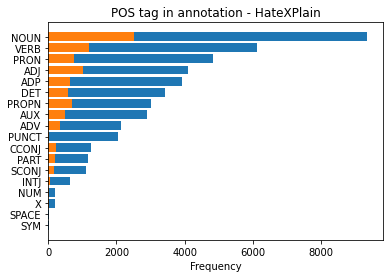

In [14]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

ax.barh(width=cnt_pos_total.values(), y=list(cnt_pos_total.keys()))
ax.barh(width=cnt_pos.values(), y=list(cnt_pos.keys()))

ax.invert_yaxis()

ax.set_xlabel('Frequency')
ax.set_title('POS tag in annotation - HateXPlain')

save_path = path.join(tmp_path, 'posfreq_hatexplain_test')
plt.savefig(save_path, dpi=600)
print('Saved in',save_path)

In [15]:
from data.hatexplain.dataset import HateXPlain

cnt = dict()

for split in ['test', 'val', 'train']:
    
    # Load dataset
    dataset = HateXPlain(root=dataset_path, split=split)
        
    cnt[split] = {}
    
    for label in ['hatespeech', 'offensive']:
        data = dataset.data.copy()
        data = data[data['label'] == label].reset_index()
        tokens = data['post_tokens']
        rationale = data['rationale']

        # Add punctuation to separate sentences
        for i in range(len(tokens)):
            tokens[i].append('.')
            rationale[i].append(0)

        flatten_token = [tk for sent in tokens for tk in sent]
        flatten_rationale = [r for sent in rationale for r in sent]

        nlp = spacy.load('en_core_web_sm')
        doc = Doc(nlp.vocab, words=flatten_token)
        pos = [tk.pos_ for tk in nlp(doc)]

        # Start counting
        cnt_pos = dict()
        cnt_tok = dict()
        cnt_pos_total = dict()
        cnt_tok_total = dict()

        for p, r, t in tqdm(zip(pos, flatten_rationale, flatten_token), total=len(flatten_rationale), desc=split):

            cnt_pos_total[p] = cnt_pos_total.get(p, 0) +1
            cnt_tok_total[t] = cnt_tok_total.get(t, 0) +1

            if r > 0:
                cnt_pos[p] = cnt_pos.get(p, 0) + 1
                cnt_tok[t] = cnt_tok.get(t, 0) + 1

        cnt[split][label] = {
            'pos' : cnt_pos,
            'tok' : cnt_tok,
            'pos_total': cnt_pos_total,
            'tok_total': cnt_tok_total
        }

test:   0%|          | 0/15316 [00:00<?, ?it/s]

test:   0%|          | 0/12611 [00:00<?, ?it/s]

val:   0%|          | 0/15133 [00:00<?, ?it/s]

val:   0%|          | 0/12719 [00:00<?, ?it/s]

train:   0%|          | 0/121254 [00:00<?, ?it/s]

train:   0%|          | 0/102664 [00:00<?, ?it/s]

In [16]:
# report annotated proportion
for split, cnt_split in cnt.items():
    for label in cnt_split:
        print(split, label)
        print('Annotated POS :', sum(cnt[split][label]['pos'].values()), '/', sum(cnt[split][label]['pos_total'].values()), '(', round(sum(cnt[split][label]['pos'].values())*100/sum(cnt[split][label]['pos_total'].values()), 2), '%)')
        print('Annotated token :', sum(cnt[split][label]['tok'].values()), '/', sum(cnt[split][label]['tok_total'].values()), '(', round(sum(cnt[split][label]['tok'].values())*100/sum(cnt[split][label]['tok_total'].values()), 2), '%)')
        print('='*15)

test hatespeech
Annotated POS : 4397 / 15316 ( 28.71 %)
Annotated token : 4397 / 15316 ( 28.71 %)
test offensive
Annotated POS : 4513 / 12611 ( 35.79 %)
Annotated token : 4513 / 12611 ( 35.79 %)
val hatespeech
Annotated POS : 4474 / 15133 ( 29.56 %)
Annotated token : 4474 / 15133 ( 29.56 %)
val offensive
Annotated POS : 4772 / 12719 ( 37.52 %)
Annotated token : 4772 / 12719 ( 37.52 %)
train hatespeech
Annotated POS : 34053 / 121254 ( 28.08 %)
Annotated token : 34053 / 121254 ( 28.08 %)
train offensive
Annotated POS : 38846 / 102664 ( 37.84 %)
Annotated token : 38846 / 102664 ( 37.84 %)


In [19]:
cnt.keys()

dict_keys(['test', 'val', 'train'])

In [20]:
cnt['test'].keys(
)

dict_keys(['hatespeech', 'offensive'])

In [21]:
# re-arrange the dictionary of cnt: first label, then for each label, splits
cnt_arranged = dict()
for label in cnt['test']:
    cnt_arranged[label] = {split: cnt[split][label] for split in cnt.keys()}

In [44]:
cnt['train']['offensive'].keys()

dict_keys(['pos', 'tok', 'pos_total', 'tok_total'])

In [23]:
cnt_arranged.keys()

dict_keys(['hatespeech', 'offensive'])

In [41]:
cnt_per_label.keys()

dict_keys(['test', 'val', 'train'])

pos


KeyError: 'pos_total'

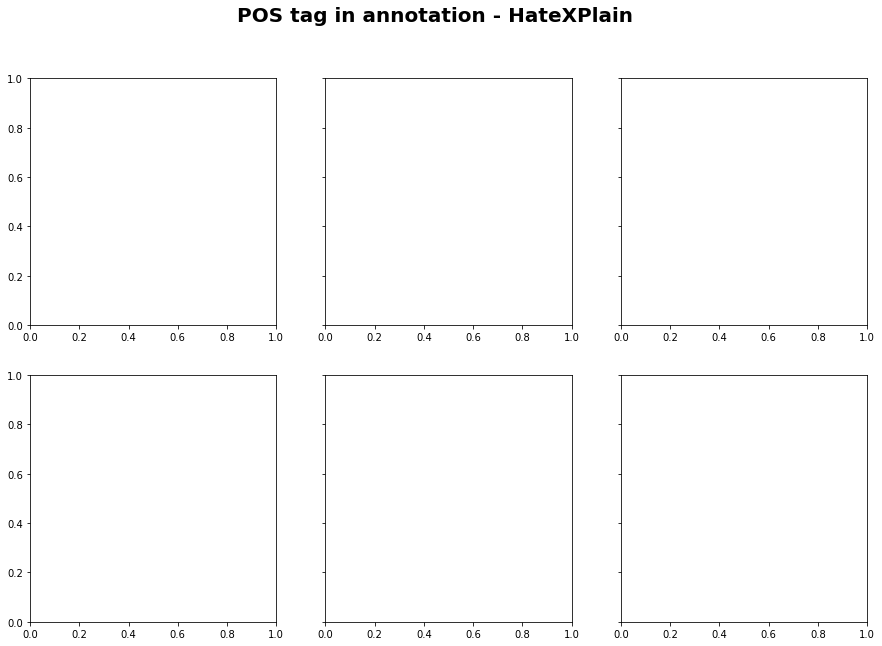

In [49]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)

fig, axes = plt.subplots(2, 3, sharey=True)

fig.suptitle('POS tag in annotation - HateXPlain', fontsize=20, fontweight='black')

for ax_row, label in zip(axes, cnt_arranged):

    cnt_per_label = cnt_arranged[label]

    for ax, pos_freq, split in zip(ax_row, cnt_per_label.values(), cnt_per_label.keys()):
        for label, pos_freq_label in pos_freq.items():
            print(label)

            cnt_pos_total = pos_freq_label['pos_total']
            cnt_pos = pos_freq_label['pos']

            ax.barh(width=cnt_pos_total.values(), y=list(cnt_pos_total.keys()))
            ax.barh(width=cnt_pos.values(), y=list(cnt_pos.keys()))

            ax.invert_yaxis()

            ax.set_xlabel('Frequency', fontsize=18)
            ax.set_title(split, fontsize=18)
        
plt.show()

#plt.savefig(path.join(tmp_path, 'posfreq_hatexplain'), dpi=600)

In [ ]:
print('Total annotated token amont NVA:')
(cnt_pos['VERB'] + cnt_pos['NOUN'] + cnt_pos['ADJ']) / sum(cnt_pos.values())

## Visualize heuristics for thesis

In [195]:
out_path = '/Users/dunguyen/Developer/server_backup/historic/2023-06-05/experiments/illustration_heuristics_hatexplain'
os.makedirs(out_path, exist_ok=True)

html_path = out_path + '/html'
os.makedirs(html_path, exist_ok=True)

In [196]:
import pandas as pd
df = pd.read_json(path.join(dataset_path, 'hatexplain', 'train.json'))
df = df[df['label'] != 'normal']

In [200]:
from modules.const import Color
from tqdm.auto import tqdm

for idx, row in tqdm(df.iterrows(), total=len(df)):
    
    tokens = row['tokens.form']
    
    html_str = '''<html>
    <head>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css" integrity="sha384-xOolHFLEh07PJGoPkLv1IbcEPTNtaed2xpHsD9ESMhqIYd0nLMwNLD69Npy4HI+N" crossorigin="anonymous">
    <style>
    table, th, td {
      border:solid black;
      border-collapse: collapse;
      padding: 0px 5px 0px 5px;
    }
    </style>
    </head>
    <body>
    <table style="font-size:120%;" cellspacing=0>
        <caption style="text-align: center;">Dataset: e-SNLI - Instance ID: 726414.jpg#1r1c</caption>
        <tr><th style="width:200px;">Explainer</th> <th style="width:500px;">Explanation</th> <th style="width:100px;">Label</th></tr>
        <tr>
    '''
    
    html_str += '''<tr><td style="text-align:right;">Anntation map</td><td>''' + highlight(tokens, row['rationale'], color=Color.HIGHLIGHT) +\
                     '''</td><td rowspan="4" style="text-align:center">'''+ row['label'] +'''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Annotation frequency</td><td>''' + highlight(tokens, row['tokens.frequency'], Color.HEURISTICS) + '''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Morphosyntactic filter</td><td>''' + highlight(tokens, row['morpho_filter'], Color.HEURISTICS) + '''</td></tr>'''
    html_str += '''<tr><td style="text-align:right;">Heuristic map</td><td>''' + highlight(tokens, row['heuristics'], Color.HEURISTICS) + '''</td></tr>'''
    
    html_str += '''
        </tr>
    </table></body></html>'''
    
    #display(HTML(html_str))
    with open(html_path + '/' + row['id'] + '.html', 'w') as f:
        f.write(html_str)

  0%|          | 0/9130 [00:00<?, ?it/s]

## Check the salient word but irrevent for explanation in test set

In [14]:
dataset = HateXPlain(root=dataset_path, split='test')

In [16]:
df = dataset.data
df

,id,annotators.annotator_id,post_tokens,label,rationale,heuristic
0,1178610029273976833_twitter,"[9, 17, 64]","[<user>, men, can, not, be, raped, can, not, b...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1165785686903009283_twitter,"[200, 199, 211]","[<user>, you, are, missing, an, essential, pre...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1252707503441313794_twitter,"[233, 215, 202]","[<user>, <user>, why, are, you, repeating, you...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1103385226921762816_twitter,"[206, 199, 203]","[<user>, <user>, well, she, ’, muslim, so, of,...",hatespeech,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1169443635869487105_twitter,"[205, 223, 208]","[<user>, lol, not, me, i, don, ’, t, deal, wit...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
1919,7645213_gab,"[225, 207, 204]","[we, hate, islam, and, we, will, mock, your, p...",hatespeech,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.858..."
1920,7672117_gab,"[13, 4, 46]","[he, sounds, like, a, clothing, line, i, will,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1921,1231804803614830592_twitter,"[203, 209, 223]","[4, chan, is, retarded, and, so, are, you]",offensive,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.00846376493504712, 0.0, 0.0,..."
1922,26732378_gab,"[9, 6, 110]","[plenty, of, e, celebs, have, covered, israid,...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [22]:
from modules.utils import highlight

In [25]:
upon_examples = df[df['post_tokens'].apply(lambda x: 'upon' in x)]
upon_examples = upon_examples[upon_examples['label']=='hatespeech']

html = '<table>'
html = ''
for idx, row in upon_examples.iterrows():
    print(row['post_tokens'])
    print(row['rationale'])
    print()
    #display(HTML(highlight(row['post_tokens'], row['rationale'])))
    
html += '</table>'

['education', 'or', 'marxist', 'indoctrination', 'since', 'it', 'is', 'well', 'established', 'blacks', 'are', 'incapable', 'of', 'learning', 'anything', 'past', 'the', 'age', 'of', 'ten', 'unless', 'they', 'are', 'half', 'white', 'should', 'not', 'blacks', 'go', 'to', 'a', 'trade', 'school', 'upon', 'age', '<number>', 'say', 'learning', 'how', 'to', 'pick', 'cotton', 'fruits', 'and', 'vegetables']
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [26]:
display(HTML(highlight(row['post_tokens'], row['rationale'])))

In [27]:
row['id']

'24305062_gab'

## Making of heuristic

In [5]:
from data.hatexplain.dataset import HateXPlain
import spacy
from spacy.tokens import Doc
from modules.utils import highlight
import torch

# Load dataset
dataset = HateXPlain(root=dataset_path, split='test')
tokens = dataset.data['post_tokens'].tolist()
rationale = dataset.data['rationale'].tolist()

flatten_token = [tk for sent in tokens for tk in sent]
flatten_rationale = [r for sent in rationale for r in sent]

nlp = spacy.load('en_core_web_sm')

doc = Doc(nlp.vocab, words=flatten_token)
pos = [tk.pos_ for tk in nlp(doc)]

# build mask
pos_filter = [[tk.pos_ in ['ADJ'] for tk in d] for d in tokenized_docs]
stop_filter = [[not tk.is_stop for tk in d] for d in tokenized_docs]
mask = [pos_ and stop_ for pos_, stop_ in zip(pos_filter, stop_filter)]

# Count frequence
token_freq = dict()
flatten_token = [tk for sent in tokens for tk in sent]
flatten_rationale = [r for sent in rationale for r in sent]

for t, r in zip(flatten_token, flatten_rationale):
    if r: token_freq[t] = token_freq.get(t, 0) + 1

total_freq = sum(token_freq.values())
token_freq = {k: v/total_freq for k, v in token_freq.items()}

# Making of heuristic
heuristics = []
for sent_tokens, sent_mask in zip(tokens, mask):
    heuris_map = [token_freq.get(tk, 0) for tk in sent_tokens]
    heuris_map = [h * float(m) for h, m in zip(heuris_map, sent_mask)]
    heuristics.append(heuris_map)

tensor_heuristics = [torch.tensor(h) for h in heuristics]
for i in range(20):
    display(HTML(hightlight(tokens[i], tensor_heuristics[i])))

NameError: name 'tokenized_docs' is not defined

In [ ]:
heuristic = dataset.data['heuristic']
rationale = dataset.data['rationale']

from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(rationale, heuristic)
roc_score

In [ ]:
dataset = HateXPlain(root=path.join(cache_path, 'dataset'), split='val')
dataset.data.head()

In [ ]:
for i in range(10):
    display(HTML(hightlight(dataset.data.loc[i, 'post_tokens'], torch.tensor(dataset.data.loc[i, 'heuristic']))))

In [ ]:
heuristic = dataset.data['heuristic']
rationale = dataset.data['rationale']

heuristic = [h_value for h_vector in heuristic for h_value in h_vector]
rationale = [r_value for r_vector in rationale for r_value in r_vector]

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(rationale, heuristic)
roc_score

In [ ]:
for split in ['train', 'val', 'test']:
    dataset = HateXPlain(root=path.join(cache_path, 'dataset'), split=split)
    heuristic = dataset.data['heuristic']
    rationale = dataset.data['rationale']

    heuristic = [h_value for h_vector in heuristic for h_value in h_vector]
    rationale = [r_value for r_vector in rationale for r_value in r_vector]
    roc_score = roc_auc_score(rationale, heuristic)
    print(split, ':', roc_score)

In [ ]:
dataset = HateXPlain(root=path.join(cache_path, 'dataset'), split='test')
heuristic = dataset.data['heuristic']
rationale = dataset.data['rationale']

for i in range(10):
    display(HTML(hightlight(dataset.data.loc[i, 'post_tokens'], torch.tensor(dataset.data.loc[i, 'heuristic']))))
    
roc_score = roc_auc_score(rationale, heuristic)
print('AUROC = ', roc_score)

In [8]:
dataset.data

,post_tokens,label,rationale,heuristic
0,"[u, really, think, i, would, not, have, been, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...","[0.0007682071964552725, 0.0, 0.000905387052965..."
1,"[the, uk, has, threatened, to, return, radioac...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.00032923165562368824, 0.0, 1.371798565..."
2,"[if, english, is, not, imposition, then, hindi...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]","[0.0, 0.0001508978421608571, 0.0, 0.0, 1.37179..."
3,"[no, liberal, congratulated, hindu, refugees, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[0.0, 0.0005624374116904674, 0.0, 9.6025899556..."
4,"[he, said, bro, even, your, texts, sound, redn...",offensive,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0004252575551805973, 1.371798565098701..."
...,...,...,...,...
15378,"[thanks, for, coming, to, my, ted, talk, p.s.,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[5.487194260394804e-05, 0.0, 0.000205769784764..."
15379,"[<user>, <user>, iran, has, the, 2, n, biggest...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0004938474834355323, 0.0004938474834355323,..."
15380,"[or, maybe, those, were, not, meant, to, be, h...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0003703856125766492, 0.0, 0.0, 0.0, 5...."
15381,"[good, morning, ados, black, women, only]",normal,"[0, 0, 0, 0, 0, 0]","[0.0009191050386161296, 4.115395695296103e-05,..."


In [13]:
heuristic.isnan()

AttributeError: 'numpy.ndarray' object has no attribute 'isnan'

In [3]:
from sklearn.metrics import average_precision_score
import numpy as np
from data.hatexplain.dataset import HateXPlain

for split in ['train', 'val', 'test']:
    dataset = HateXPlain(root=path.join(cache_path, 'dataset'), split=split)
    dataset.data = dataset.data[dataset.data['label'] != 'normal'].reset_index()
    
    h_vectors = [np.array(h_vector)/sum(h_vector) for h_vector in dataset.data['heuristic']]
    h_vectors = [(h-h.min())/(h.max()-h.min() + (h.max()==h.min())) for h in h_vectors]
    heuristic = np.concatenate(h_vectors)
    
    rationale = np.array([r_value for r_vector in dataset.data['rationale'] for r_value in r_vector])
    auprc = average_precision_score(rationale, heuristic)
    
    print(split, ':', auprc)

train : 0.5044194852915073
val : 0.5280741352217981
test : 0.522427389102623


## Check Dataset

In [7]:
from data_module.hatexplain_module import HateXPlainDM
from data.hatexplain.dataset import HateXPlain

In [8]:
hatexplain = HateXPlain(root=dataset_path, split='test')

In [9]:
hatexplain.data

,annotators.annotator_id,post_tokens,label,rationale,heuristic
0,"[9, 17, 64]","[<user>, men, can, not, be, raped, can, not, b...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[200, 199, 211]","[<user>, you, are, missing, an, essential, pre...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[233, 215, 202]","[<user>, <user>, why, are, you, repeating, you...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[206, 199, 203]","[<user>, <user>, well, she, ’, muslim, so, of,...",hatespeech,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[205, 223, 208]","[<user>, lol, not, me, i, don, ’, t, deal, wit...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
1919,"[225, 207, 204]","[we, hate, islam, and, we, will, mock, your, p...",hatespeech,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.858..."
1920,"[13, 4, 46]","[he, sounds, like, a, clothing, line, i, will,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1921,"[203, 209, 223]","[4, chan, is, retarded, and, so, are, you]",offensive,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.008463997146658984, 0.0, 0.0..."
1922,"[9, 6, 110]","[plenty, of, e, celebs, have, covered, israid,...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Example where the highlighted words in hate speech is the unhatefule case

In [50]:
from data.hatexplain.dataset import HateXPlain

hatexplain = HateXPlain(root=dataset_path, split='train')
df_train = hatexplain.data

In [51]:
df_train

,id,annotators.annotator_id,post_tokens,label,rationale,heuristic
0,23107796_gab,"[203, 204, 233]","[u, really, think, i, would, not, have, been, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,9995600_gab,"[27, 6, 4]","[the, uk, has, threatened, to, return, radioac...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1227920812235051008_twitter,"[209, 203, 222]","[if, english, is, not, imposition, then, hindi...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1204931715778543624_twitter,"[235, 222, 209]","[no, liberal, congratulated, hindu, refugees, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[0.0, 0.0005624219810971344, 0.0, 0.0, 0.0, 0...."
4,1179102559241244672_twitter,"[51, 25, 4]","[he, said, bro, even, your, texts, sound, redn...",offensive,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"[217, 206, 223]","[thanks, for, coming, to, my, ted, talk, p.s.,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.3717609295052059e-..."
15379,1191705189587341312_twitter,"[209, 200, 199]","[<user>, <user>, iran, has, the, 2, n, biggest...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00013717..."
15380,1178822728511606786_twitter,"[127, 17, 37]","[or, maybe, those, were, not, meant, to, be, h...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15381,1179009825432358913_twitter,"[49, 18, 4]","[good, morning, ados, black, women, only]",normal,"[0, 0, 0, 0, 0, 0]","[0.0009190798227684879, 0.0, 0.0, 0.0030041564..."


In [52]:
df = df_train[df_train['label'] == 'normal']
for idx, row in df.iterrows():
    if 'nigger' in row['post_tokens']:
        print(' '.join(row['post_tokens']))
        print(row)

<user> <user> i witnessed my black teammates defend and agree with my overtly racist white friend for calling a black dude a nigger i tried to defend dude being called nigger and they all hated on me
id                                               1178226486081286144_twitter
annotators.annotator_id                                          [10, 4, 39]
post_tokens                [<user>, <user>, i, witnessed, my, black, team...
label                                                                 normal
rationale                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
heuristic                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003004156435616400...
Name: 149, dtype: object
again why are you so defensive about it is some nazi gonna come in and call you a name so what i have been called nigger more times than i can count
id                                                              13501213_gab
annotators.annotator_id                                          [37, 4, 48]
post_token

## Example of heuristics

Get and generate example of heuristics highlighting on texts

In [128]:
import pandas as pd
df_train = pd.read_json(path.join(dataset_path, 'hatexplain', 'train.json'))

In [129]:
df_train = df_train[df_train['label'] != 'normal']
df_train = df_train[:3]
df_train

,id,post_tokens,label,rationale,heuristic,tokens.form,tokens.pos,tokens.norm,tokens.is_stop,morpho_filter,heuristics
0,23107796_gab,"[u, really, think, i, would, not, have, been, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[u, really, think, i, would, not, have, been, ...","[PRON, ADV, VERB, PRON, AUX, PART, AUX, AUX, V...","[u, really, think, i, would, not, have, be, ra...","[False, True, False, True, True, True, True, T...","[False, False, True, False, False, False, Fals...","[0.0, 0.0, 0.1208053691, 0.0, 0.0, 0.0, 0.0, 0..."
1,9995600_gab,"[the, uk, has, threatened, to, return, radioac...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[the, uk, has, threatened, to, return, radioac...","[DET, PROPN, AUX, VERB, PART, VERB, ADJ, NOUN,...","[the, uk, have, threaten, to, return, radioact...","[True, False, True, False, True, False, False,...","[False, False, False, True, False, True, True,...","[0.0, 0.0, 0.0, 0.1063829787, 0.0, 0.161290322..."
2,1227920812235051008_twitter,"[if, english, is, not, imposition, then, hindi...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[if, english, is, not, imposition, then, hindi...","[SCONJ, PROPN, AUX, PART, NOUN, ADV, NOUN, AUX...","[if, english, be, not, imposition, then, hindi...","[True, False, True, True, False, True, False, ...","[False, False, False, False, True, False, True...","[0.0, 0.0, 0.0, 0.0, 0.33333333330000003, 0.0,..."


In [66]:
# Check annotation frequency
import json

with open(path.join(dataset_path, 'hatexplain', 'annotation_lexical_frequency.json'), 'r') as f:
    annot_frequency = json.load(f)

In [113]:
from modules import highlight

for idx, row in data.iterrows():
    print('idx', idx, 'instance_id', row['id'])
    raw_heuristics = [annot_frequency.get(tk, 0) for tk in row['tokens.form']]
    new_heuristics = [0 if not f else h for h, f in zip(raw_heuristics, row['morpho_filter'])]
    
    display(HTML(''+ highlight(row['tokens.form'], row['rationale'])))
    display(HTML(highlight(row['tokens.pos'], row['morpho_filter'])))
    display(HTML(highlight(row['tokens.form'], row['heuristics'])))
    display(HTML(highlight(row['tokens.form'], row['heuristic'])))
    print(raw_heuristics)
    print()
    break

idx 0 instance_id 23107796_gab


[0.0007681861205229152, 0.0006584452461624988, 0.0009053622134734358, 0.007448661847213268, 0.002139947050028121, 0.008491200153637224, 0.0048560336904484285, 0.0009739502599486962, 0.0027023690311252556, 0.0038546482119096283, 8.230565577031235e-05, 9.60232650653644e-05, 0.0033196614494025983, 0.004760010425383064, 0.0010974087436041646, 0.009588608897241389, 2.7435218590104118e-05, 0.0033196614494025983, 1.3717609295052059e-05, 0.019821945431350223, 0.01860107820409059, 0.0001646113115406247, 0.002139947050028121, 0.002139947050028121, 0.0013443257109151017, 0.001165996790079425, 0.0033196614494025983, 0.0005075515439169261, 0.002510322500994527, 0.01846390211114007, 0.000727033292637759, 0.001165996790079425, 8.230565577031235e-05]



In [68]:
annot_frequency['muslim']

0.004760010425383064

# Cached parquet file: Visualization and Manipulation

In [2]:
import pandas as pd

# fname = './../.cache/dataset/esnli/test.pretransformed.parquet'

fname = '/home/dunguyen/RUNS/dataset/hatexplain/test.parquet'
df = pd.read_parquet(fname)
df

,id,annotators.annotator_id,post_tokens,label,rationale,heuristic,tokens.norm,tokens.form
0,1178610029273976833_twitter,"[9, 17, 64]","[<user>, men, can, not, be, raped, can, not, b...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[<user>, men, can, not, be, raped, can, not, b...","[<user>, men, can, not, be, raped, can, not, b..."
1,1165785686903009283_twitter,"[200, 199, 211]","[<user>, you, are, missing, an, essential, pre...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[<user>, you, are, missing, an, essential, pre...","[<user>, you, are, missing, an, essential, pre..."
2,1252707503441313794_twitter,"[233, 215, 202]","[<user>, <user>, why, are, you, repeating, you...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[<user>, <user>, why, are, you, repeating, you...","[<user>, <user>, why, are, you, repeating, you..."
3,1103385226921762816_twitter,"[206, 199, 203]","[<user>, <user>, well, she, ’, muslim, so, of,...",hatespeech,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[<user>, <user>, well, she, ’, muslim, so, of,...","[<user>, <user>, well, she, ’, muslim, so, of,..."
4,1169443635869487105_twitter,"[205, 223, 208]","[<user>, lol, not, me, i, don, ’, t, deal, wit...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[<user>, lol, not, me, i, don, ’, t, deal, wit...","[<user>, lol, not, me, i, don, ’, t, deal, wit..."
...,...,...,...,...,...,...,...,...
1919,7645213_gab,"[225, 207, 204]","[we, hate, islam, and, we, will, mock, your, p...",hatespeech,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.858...","[we, hate, islam, and, we, will, mock, your, p...","[we, hate, islam, and, we, will, mock, your, p..."
1920,7672117_gab,"[13, 4, 46]","[he, sounds, like, a, clothing, line, i, will,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[he, sounds, like, a, clothing, line, i, will,...","[he, sounds, like, a, clothing, line, i, will,..."
1921,1231804803614830592_twitter,"[203, 209, 223]","[4, chan, is, retarded, and, so, are, you]",offensive,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.00846376493504712, 0.0, 0.0,...","[4, chan, is, retarded, and, so, are, you]","[4, chan, is, retarded, and, so, are, you]"
1922,26732378_gab,"[9, 6, 110]","[plenty, of, e, celebs, have, covered, israid,...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[plenty, of, e, celebs, have, covered, israid,...","[plenty, of, e, celebs, have, covered, israid,..."


In [3]:
df.set_index('id', inplace=True)

In [4]:
id_instance = '1242188730099793920_twitter'

In [63]:
df.loc[id_instance]

NameError: name 'id_instance' is not defined